저번에 선형회귀(linear regression)에 대해 간단하게 알아봤다.
이제 다중 선형회귀(multi linear regression)으로 넘어가보자.
다중선형회귀랑 일반적인 선형회귀의 차이점은 출력값인 y가 여러 입력 값에 영향을 받는 것이다.

즉 단순 선형회귀에서 가설(예측)함수가 다음과 같다면
h(x) = theta_0 + theta_1*x_1 
where x_1 is only input value

다중 선형회귀에서의 가설(예측)함수는 다음과 같다는 것이다.
h(x) = theta_0 + theta_1 * x_1 + theta_2 * x_2 .....theat_n * x_n
where x_1, x_2...x_n are multiple input values
여기서 입력 변수의 개수를 feature 라고 한다.
그렇다면 다중 선형회귀와 단순 선형회귀는 무엇이 같고 무엇이 다를까?

일단 비용함수는 변하지 않는다.

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Cost_Function_Formula.png)

경사 하강법 알고리즘(Gradient Descent Algorithm)에서는 약간의 변화가 일어나는데 
${\mathbf {\theta}}$  값이 좀 많아질뿐, 근본적인 공식에서의 변화는 존재하지 않는다.

${\mathbf {\theta}}$ 의 개수 = 피처의 개수 +1 , +1은 절편때문에 존재하는것이다.

자 이제 코드를 통해서 구현을 해보자.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
red_wine = pd.read_csv('../winequality-red.csv', sep=';')
white_wine = pd.read_csv('../winequality-white.csv',sep=';')
df = pd.concat([red_wine, white_wine])
df.reset_index(drop=True, inplace=True)
df.info()
df.head() # To get first n rows from the dataset default value of n is 5
####Ktfgfgdfgdfg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
y = df['quality'] # 레이블(종속변수)
X = df.drop(['quality'], axis=1, inplace=False) # 피처(독립변수)
X= X.to_numpy()
X1 = X
#X = df.values[:, 0:11]  # get input values from first two columns
#y = df.values[:, 0]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))
print(X[0:1,:])
# Show only first 5 records
# for i in range(5):
#     print('x =', X[i], ', y =', y[i])

Total no of training examples (m) = 6497 

[[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
   0.56    9.4   ]]


총 97개의 훈련 예제가 있습니다(m= 97 또는 97 행 없음).
두 가지 기능이 있습니다(기능 열 두 개와 레이블/대상/y 열 하나).
기능의 총 수(n) = 2(나중에 일(x_0) 열을 추가하여 3으로 만듭니다)

기능 정규화
당신이 알 수 있듯이 집의 크기와 침실의 수는 같은 범위에 있지 않습니다(집 크기는 침실 수의 약 1000배입니다). 이는 경사하강법 알고리즘 성능에 부정적인 영향을 미칩니다.
경사하강법 알고리즘에서 우리는 모든 단계에 대한 비용을 계산합니다. 그리고 입력 값이 크기 순서에 따라 다르다면 모든 경사 하강 단계 이후의 결과도 많이 달라질 것입니다.
입력 변수의 범위를 변경하여 이를 방지할 수 있습니다.
아래 기술을 사용하여 입력 변수의 범위를 변경합니다.
기능 확장
평균 정규화

Feature Scaling : Feature scaling에서는 입력 값을 입력 변수의 범위(최대 - 최소)로 나눕니다. 이 기술로 우리는 단 1의 새로운 범위를 얻습니다.
 x1 = x1 / s1
  where,
  x1 = input variable
  s1 = range
 
  x1 = (x1 - mu1)/s1
  where,
  x1 = input variable
  mu1 = average value
  s1 = range or standard deviation

이제 적용을 하기전에 약간의 문제가 생기는데 변수를 그대로 적용하면 함수가 박살납니다.
x1이 0~1범위인데 x2가 0~1000범위를 갖게되면 그래프가 아주 이상하게 나오거든요.
그래서 일단 모든 변수의 범위를 0~1로 지정해줄 변수 정규화(feature normalize)를 먼저 진행할겁니다.

In [18]:
def feature_normalize(X):
  """
    Normalizes the features(input variables) in X.

    Parameters
    ----------
    X : n dimensional array (matrix), shape (n_samples, n_features)
        Features(input varibale) to be normalized.

    Returns
    -------
    X_norm : n dimensional array (matrix), shape (n_samples, n_features)
        A normalized version of X.
    mu : n dimensional array (matrix), shape (n_features,)
        The mean value.
    sigma : n dimensional array (matrix), shape (n_features,)
        The standard deviation.
  """
  #Note here we need mean of indivdual column here, hence axis = 0
  mu = np.mean(X, axis = 0)  
  # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
  sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range) 표준편차 ddof를 지정해주는 이유는 numpy의 std default가 0이기 때문
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma

In [19]:
X, mu, sigma = feature_normalize(X)

print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', X[:5])

mu=  [7.21530706e+00 3.39666000e-01 3.18633215e-01 5.44323534e+00
 5.60338618e-02 3.05253194e+01 1.15744574e+02 9.94696634e-01
 3.21850085e+00 5.31268278e-01 1.04918008e+01]
sigma=  [1.29643376e+00 1.64636474e-01 1.45317865e-01 4.75780374e+00
 3.50336014e-02 1.77493998e+01 5.65218545e+01 2.99867300e-03
 1.60787202e-01 1.48805874e-01 1.19271175e+00]
X_norm=  [[ 0.1424623   2.18866446 -2.19266376 -0.74472079  0.56991395 -1.10005519
  -1.44624721  1.03491316  1.81294997  0.19308191 -0.91539371]
 [ 0.45100101  3.28198234 -2.19266376 -0.59759408  1.19788251 -0.31129613
  -0.86240225  0.70143232 -0.11506417  0.99950169 -0.58002349]
 [ 0.45100101  2.55310376 -1.9174051  -0.66064838  1.02661836 -0.87469546
  -1.09240178  0.76812849  0.25809985  0.79789675 -0.58002349]
 [ 3.07358005 -0.36241058  1.66095741 -0.74472079  0.54136993 -0.76201559
  -0.98624815  1.10160933 -0.36384019  0.32748521 -0.58002349]
 [ 0.1424623   2.18866446 -2.19266376 -0.74472079  0.56991395 -1.10005519
  -1.44624721  1.0

In [20]:
mu_testing = np.mean(X, axis = 0) # mean
mu_testing

array([-4.54957331e-16,  1.04990153e-16,  2.62475383e-17,  5.24950767e-17,
        1.74983589e-17, -1.04990153e-16,  0.00000000e+00, -3.55216686e-15,
        2.72974399e-15, -4.89954049e-16,  9.79908098e-16])

In [21]:
sigma_testing = np.std(X, axis = 0, ddof = 1) # mean
sigma_testing

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
X = np.hstack((np.ones((m,1)), X))
X[:5]

array([[ 1.        ,  0.1424623 ,  2.18866446, -2.19266376, -0.74472079,
         0.56991395, -1.10005519, -1.44624721,  1.03491316,  1.81294997,
         0.19308191, -0.91539371],
       [ 1.        ,  0.45100101,  3.28198234, -2.19266376, -0.59759408,
         1.19788251, -0.31129613, -0.86240225,  0.70143232, -0.11506417,
         0.99950169, -0.58002349],
       [ 1.        ,  0.45100101,  2.55310376, -1.9174051 , -0.66064838,
         1.02661836, -0.87469546, -1.09240178,  0.76812849,  0.25809985,
         0.79789675, -0.58002349],
       [ 1.        ,  3.07358005, -0.36241058,  1.66095741, -0.74472079,
         0.54136993, -0.76201559, -0.98624815,  1.10160933, -0.36384019,
         0.32748521, -0.58002349],
       [ 1.        ,  0.1424623 ,  2.18866446, -2.19266376, -0.74472079,
         0.56991395, -1.10005519, -1.44624721,  1.03491316,  1.81294997,
         0.19308191, -0.91539371]])

In [23]:
def compute_cost(X, y, theta):
  """
  Compute the cost of a particular choice of theta for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  J = 1 / (2 * m) * np.sum(sqrErrors)#rmse
  # OR
  # We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
  #J = 1/(2 * m) * errors.T.dot(errors)

  return J

In [24]:
def gradient_descent(X, y, theta, alpha, iterations):

  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, y) #예측값과 실제 y값의 차이
    #print('errors= ', errors[:5])
    sum_delta = (alpha / m) * X.transpose().dot(errors) #X전치행렬과 에러의 행렬곱
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta

    cost_history[i] = compute_cost(X, y, theta)  

  return theta, cost_history

In [25]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
theta = np.zeros(12)
iterations = 400
alpha = 0.15

In [26]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :]) 

Final value of theta = [ 5.81837771  0.08094208 -0.22034331 -0.01591252  0.1980981  -0.01782952
  0.10596625 -0.13897289 -0.15028519  0.06643689  0.11275048  0.32531627]
First 5 values from cost_history = [12.56965859  9.15470075  6.69050176  4.91113442  3.62574769  2.69695708
  2.02570327  1.54049575  1.18971369  0.93607215  0.7526357   0.61994312
  0.52393206  0.45444048  0.40412429  0.36767553  0.34125752  0.32209676
  0.30818814  0.29808181]
Last 5 values from cost_history = [0.26986479 0.26986472 0.26986466 0.26986459 0.26986452]


Text(0.5, 1.0, 'Convergence of gradient descent')

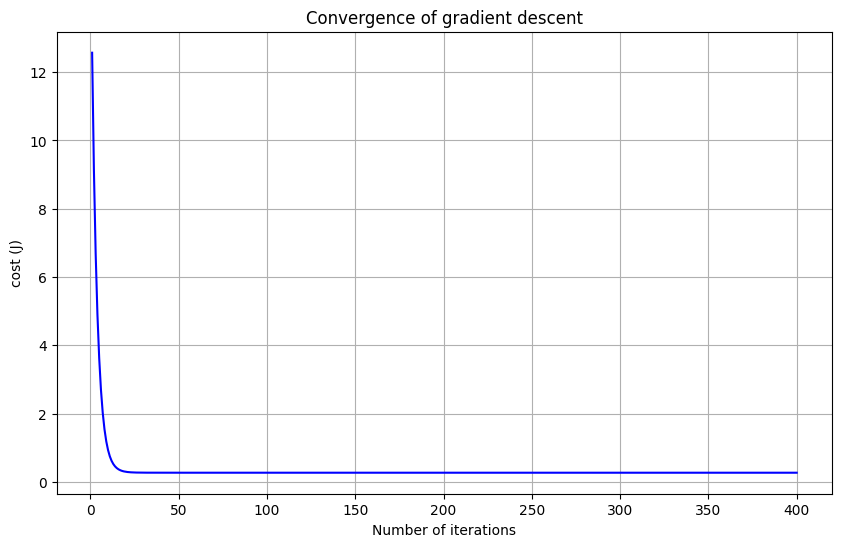

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

학습률이 미치는 영향
수렴에 대한 학습률의 영향을 확인하기 위해 다른 학습률에 대한 비용 기록을 저장하고 더 나은 시각화를 위해 수렴 플롯을 플롯할 수 있습니다.
학습률이 변경됨에 따라 수렴 곡선의 변화에 ​​주목하십시오.
학습률이 작은 경우(alpha = 0.005, 보라색 선) 기울기 하강법은 최적의 값으로 수렴하는 데 매우 오랜 시간이 걸립니다.
알파 값을 높이면 기울기가 날카로워지고 경사 하강법이 수렴하는 데 걸리는 시간이 줄어듭니다.
그러나 학습률(알파 = 1.32, 갈색 선)의 값이 너무 크면 경사 하강법이 모든 반복에서 감소하지 않고 발산할 수도 있습니다

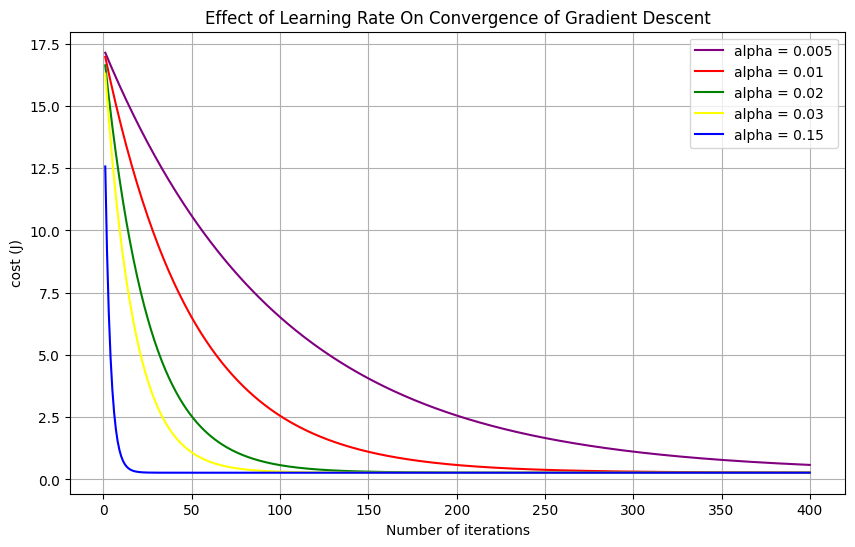

In [28]:
iterations = 400
theta = np.zeros(12)

alpha = 0.005
theta_1, cost_history_1 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.01
theta_2, cost_history_2 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.02
theta_3, cost_history_3 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.03
theta_4, cost_history_4 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.15
theta_5, cost_history_5 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.02')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.03')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

In [29]:
def RMSE(theta,pred):
    

IndentationError: expected an indented block (1474067438.py, line 2)

Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

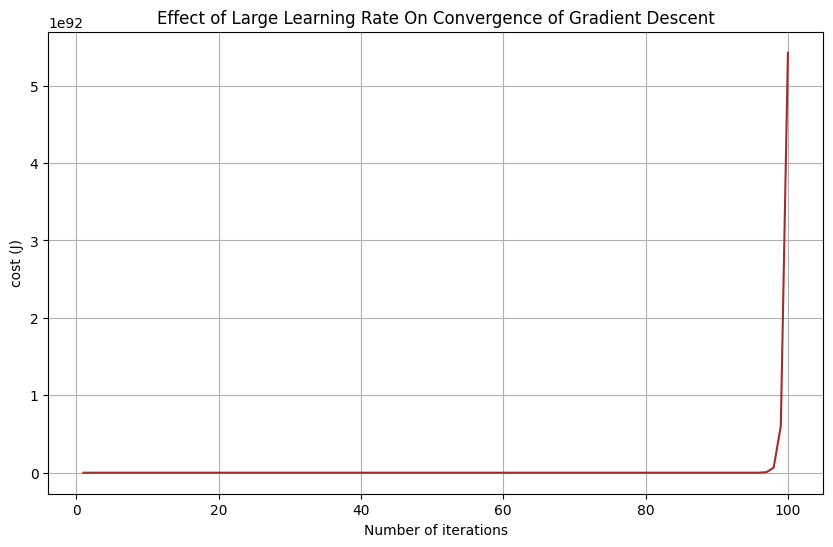

In [ ]:
iterations = 100
theta = np.zeros(12)

alpha = 1.32
theta_6, cost_history_6 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent")

In [ ]:
#normalize_test_data = ((np.array([1650, 12]) - mu) / sigma)
# print(X[0:1,:].size)
normalize_test_data = ((X1[32]) - mu) / sigma
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
quality0 = normalize_test_data.dot(theta)
quality1 = normalize_test_data.dot(theta_1)
quality2 = normalize_test_data.dot(theta_2)
quality3 = normalize_test_data.dot(theta_3)
quality4 = normalize_test_data.dot(theta_4)
quality5 = normalize_test_data.dot(theta_5)
print('Predicted quality in alpha0', quality0)
print('Predicted quality in alpha1', quality1)
print('Predicted quality in alpha2', quality2)
print('Predicted quality in alpha3', quality3)
print('Predicted quality in alpha4', quality4)
print('Predicted quality in alpha5', quality5)

print('actual quality',y[32])


Predicted quality in alpha0 0.0
Predicted quality in alpha1 4.410754961811853
Predicted quality in alpha2 5.00957616542096
Predicted quality in alpha3 5.067612724487796
Predicted quality in alpha4 5.058091616277403
Predicted quality in alpha5 5.048699604951083
actual quality 5
